In [1]:
import pandas as pd
bikes = pd.read_csv("C:/Users/mkhee/Downloads/bikes.csv")
bikes.head(10)

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000


In [2]:
import matplotlib as mpl
mpl.rcParams['axes.color_cycle'] = ['#7FB5C7', '#E63E65', '#5B5BC9', '#55D957']

%matplotlib inline

C:\Users\mkhee\Anaconda3\lib\site-packages\matplotlib\__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [9]:
bikes.describe()

,temperature,humidity,windspeed,count
count,729.000000,729.000000,729.000000,729.000000
mean,17.762024,56.514591,17.241418,622.818930
std,8.921313,7.348730,5.222353,383.958772
min,-2.200000,21.300000,5.300000,2.000000
25%,10.066578,51.561669,13.462096,256.333333
50%,18.087694,56.546144,16.656522,639.000000
75%,25.455587,61.423987,20.320807,891.666667
max,35.100000,75.600000,35.200000,1820.000000


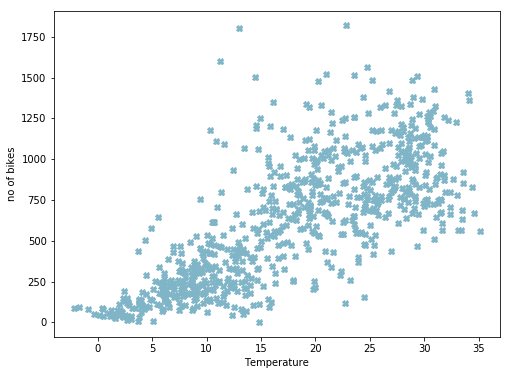

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'X')
plt.xlabel('Temperature')
plt.ylabel('no of bikes')
plt.show()

Why Decision Trees? 

It is a rule based technique. The prediction is done by applying a cascade of rules of the type “is the temperature less or equal than x degrees?”. This makes the model easy to interpret.
It doesn’t require any data transformation. It means that we don’t have to spend more time preprocessing the data.
It can handle complex relationships (not only simple linear relationships).

In [4]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temperature']]).T, bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
regressor.predict(5.)

array([ 189.23183761])

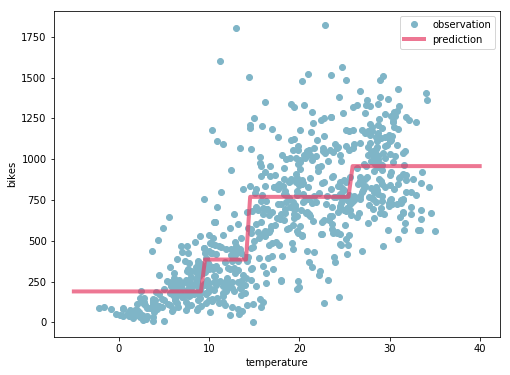

In [6]:
#prediction when temperature varies
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

In [10]:

from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='tree.dot', feature_names=['temperature'])

###### to convert the tree in a png image

In [13]:
!dot -Tpng tree.dot > tree.png 

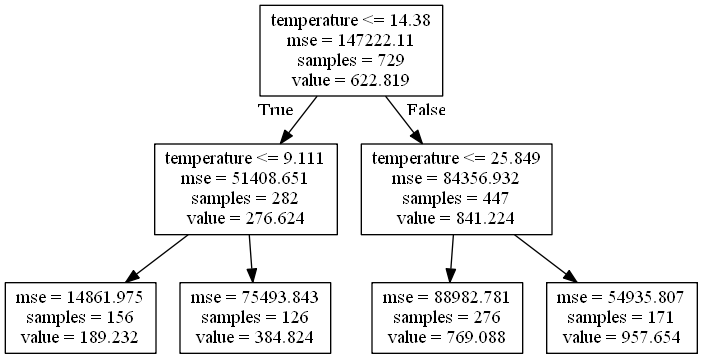

In [12]:
from IPython.display import Image
Image(filename='tree.png')